# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

## Import Statements

In [71]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [72]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [120]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames?
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [74]:
print("Shape of df_hh_income:", df_hh_income.shape)
print("Shape of df_pct_poverty:", df_pct_poverty.shape)
print("Shape of df_pct_completed_hs:", df_pct_completed_hs.shape)
print("Shape of df_share_race_city:", df_share_race_city.shape)
print("Shape of df_fatalities:", df_fatalities.shape)

Shape of df_hh_income: (29322, 3)
Shape of df_pct_poverty: (29329, 3)
Shape of df_pct_completed_hs: (29329, 3)
Shape of df_share_race_city: (29268, 7)
Shape of df_fatalities: (2535, 14)


In [75]:
print("\nColumn names of df_hh_income:", df_hh_income.columns.tolist())
print("Column names of df_pct_poverty:", df_pct_poverty.columns.tolist())
print("Column names of df_pct_completed_hs:", df_pct_completed_hs.columns.tolist())
print("Column names of df_share_race_city:", df_share_race_city.columns.tolist())
print("Column names of df_fatalities:", df_fatalities.columns.tolist())


Column names of df_hh_income: ['Geographic Area', 'City', 'Median Income']
Column names of df_pct_poverty: ['Geographic Area', 'City', 'poverty_rate']
Column names of df_pct_completed_hs: ['Geographic Area', 'City', 'percent_completed_hs']
Column names of df_share_race_city: ['Geographic area', 'City', 'share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']
Column names of df_fatalities: ['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender', 'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera']


In [76]:
# NaN
print("\nNaN values in df_hh_income:", df_hh_income.isna().sum().sum())
print("NaN values in df_pct_poverty:", df_pct_poverty.isna().sum().sum())
print("NaN values in df_pct_completed_hs:", df_pct_completed_hs.isna().sum().sum())
print("NaN values in df_share_race_city:", df_share_race_city.isna().sum().sum())
print("NaN values in df_fatalities:", df_fatalities.isna().sum().sum())

# duplicatas
print("\nDuplicate rows in df_hh_income:", df_hh_income.duplicated().sum())
print("Duplicate rows in df_pct_poverty:", df_pct_poverty.duplicated().sum())
print("Duplicate rows in df_pct_completed_hs:", df_pct_completed_hs.duplicated().sum())
print("Duplicate rows in df_share_race_city:", df_share_race_city.duplicated().sum())
print("Duplicate rows in df_fatalities:", df_fatalities.duplicated().sum())


NaN values in df_hh_income: 51
NaN values in df_pct_poverty: 0
NaN values in df_pct_completed_hs: 0
NaN values in df_share_race_city: 0
NaN values in df_fatalities: 346

Duplicate rows in df_hh_income: 0
Duplicate rows in df_pct_poverty: 0
Duplicate rows in df_pct_completed_hs: 0
Duplicate rows in df_share_race_city: 0
Duplicate rows in df_fatalities: 0


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate.

In [77]:
df_hh_income.fillna(0, inplace=True)
df_pct_poverty.fillna(0, inplace=True)
df_pct_completed_hs.fillna(0, inplace=True)
df_share_race_city.fillna(0, inplace=True)
df_fatalities.fillna(0, inplace=True)


In [78]:

# NaN
print("\nNaN values in df_hh_income:", df_hh_income.isna().sum().sum())
print("NaN values in df_pct_poverty:", df_pct_poverty.isna().sum().sum())
print("NaN values in df_pct_completed_hs:", df_pct_completed_hs.isna().sum().sum())
print("NaN values in df_share_race_city:", df_share_race_city.isna().sum().sum())
print("NaN values in df_fatalities:", df_fatalities.isna().sum().sum())

# duplicatas
print("\nDuplicate rows in df_hh_income:", df_hh_income.duplicated().sum())
print("Duplicate rows in df_pct_poverty:", df_pct_poverty.duplicated().sum())
print("Duplicate rows in df_pct_completed_hs:", df_pct_completed_hs.duplicated().sum())
print("Duplicate rows in df_share_race_city:", df_share_race_city.duplicated().sum())
print("Duplicate rows in df_fatalities:", df_fatalities.duplicated().sum())


NaN values in df_hh_income: 0
NaN values in df_pct_poverty: 0
NaN values in df_pct_completed_hs: 0
NaN values in df_share_race_city: 0
NaN values in df_fatalities: 0

Duplicate rows in df_hh_income: 0
Duplicate rows in df_pct_poverty: 0
Duplicate rows in df_pct_completed_hs: 0
Duplicate rows in df_share_race_city: 0
Duplicate rows in df_fatalities: 0


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

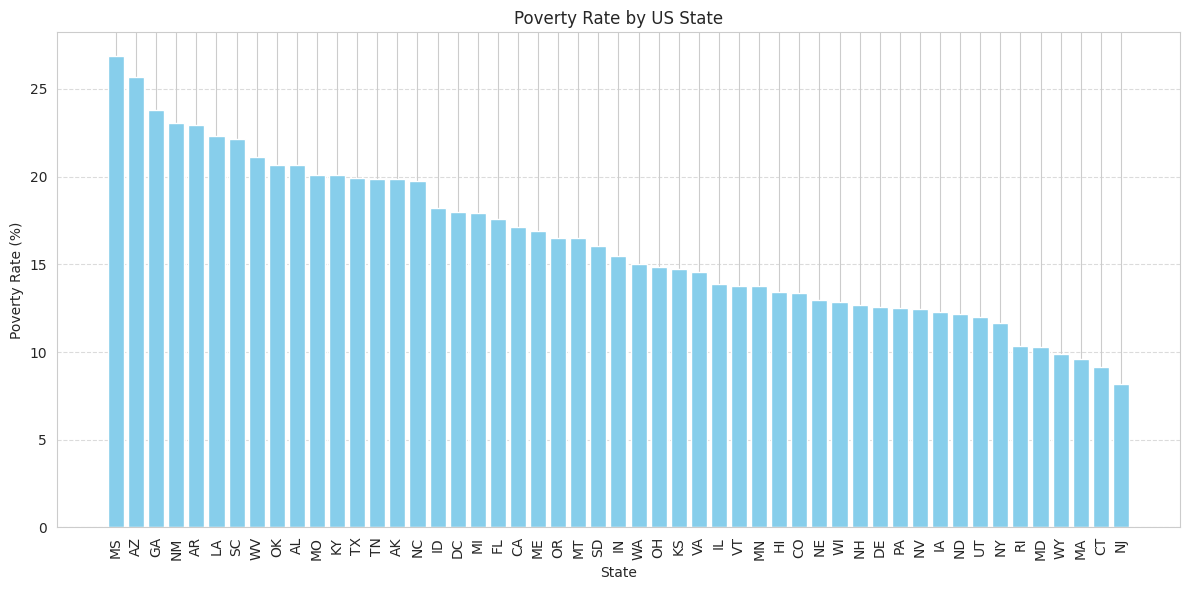

State with highest poverty rate: MS
State with lowest poverty rate: NJ


In [79]:
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')
poverty_rate_by_state = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().reset_index()

poverty_rate_by_state_sorted = poverty_rate_by_state.sort_values(by='poverty_rate', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(poverty_rate_by_state_sorted['Geographic Area'], poverty_rate_by_state_sorted['poverty_rate'], color='skyblue')
plt.xlabel('State')
plt.ylabel('Poverty Rate (%)')
plt.title('Poverty Rate by US State')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

state_with_highest_poverty_rate = poverty_rate_by_state_sorted.iloc[0]
state_with_lowest_poverty_rate = poverty_rate_by_state_sorted.iloc[-1]

print("State with highest poverty rate:", state_with_highest_poverty_rate['Geographic Area'])
print("State with lowest poverty rate:", state_with_lowest_poverty_rate['Geographic Area'])

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

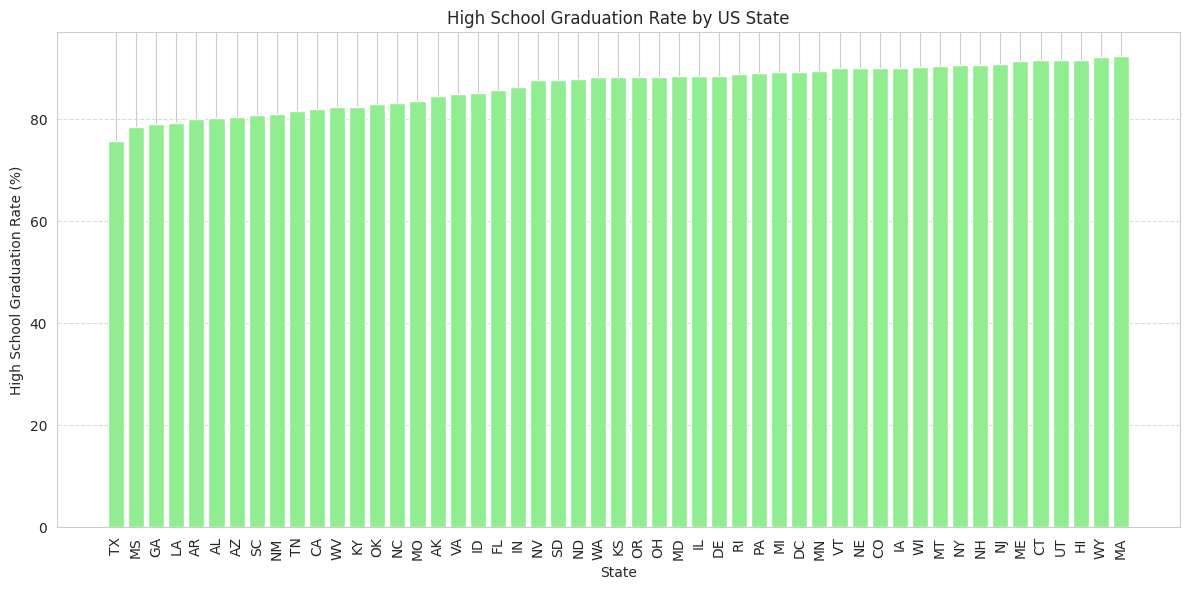

State with lowest high school graduation rate: TX
State with highest high school graduation rate: MA


In [80]:
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')

hs_completion_rate_by_state = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().reset_index()

hs_completion_rate_by_state_sorted = hs_completion_rate_by_state.sort_values(by='percent_completed_hs')

plt.figure(figsize=(12, 6))
plt.bar(hs_completion_rate_by_state_sorted['Geographic Area'], hs_completion_rate_by_state_sorted['percent_completed_hs'], color='lightgreen')
plt.xlabel('State')
plt.ylabel('High School Graduation Rate (%)')
plt.title('High School Graduation Rate by US State')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

state_with_lowest_completion_rate = hs_completion_rate_by_state_sorted.iloc[0]
state_with_highest_completion_rate = hs_completion_rate_by_state_sorted.iloc[-1]

print("State with lowest high school graduation rate:", state_with_lowest_completion_rate['Geographic Area'])
print("State with highest high school graduation rate:", state_with_highest_completion_rate['Geographic Area'])

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

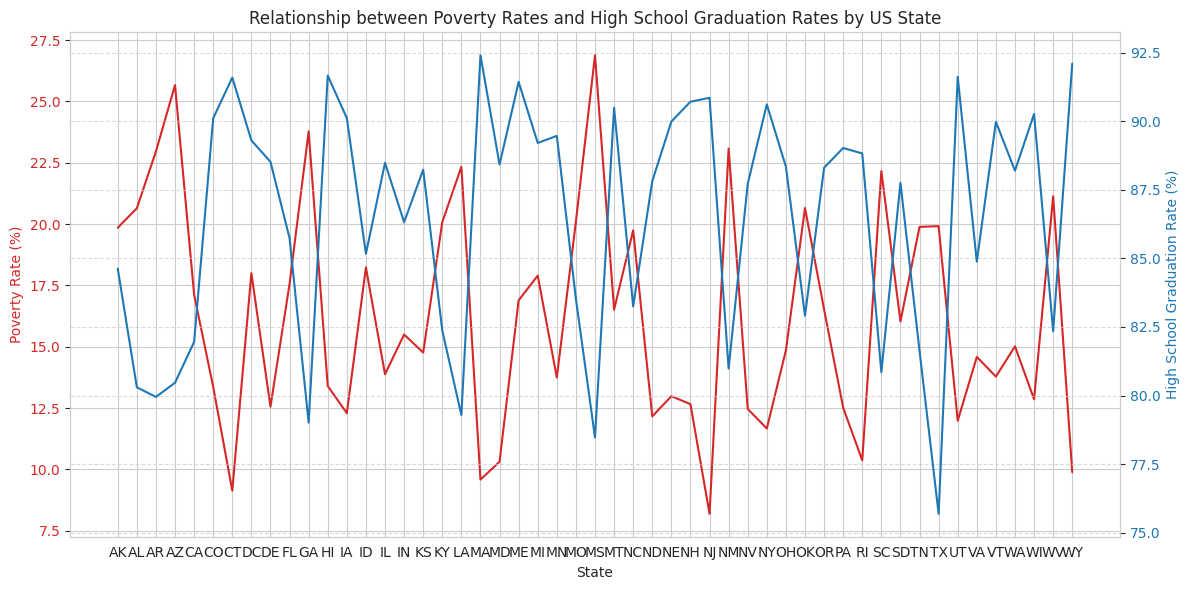

In [81]:
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')


poverty_by_state = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].mean().reset_index()
hs_completion_by_state = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].mean().reset_index()

combined_df = pd.merge(poverty_by_state, hs_completion_by_state, how='inner', on='Geographic Area')

fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:red'
ax1.set_xlabel('State')
ax1.set_ylabel('Poverty Rate (%)', color=color)
ax1.plot(combined_df['Geographic Area'], combined_df['poverty_rate'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('High School Graduation Rate (%)', color=color)
ax2.plot(combined_df['Geographic Area'], combined_df['percent_completed_hs'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Relationship between Poverty Rates and High School Graduation Rates by US State')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
fig.tight_layout()
plt.show()


#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

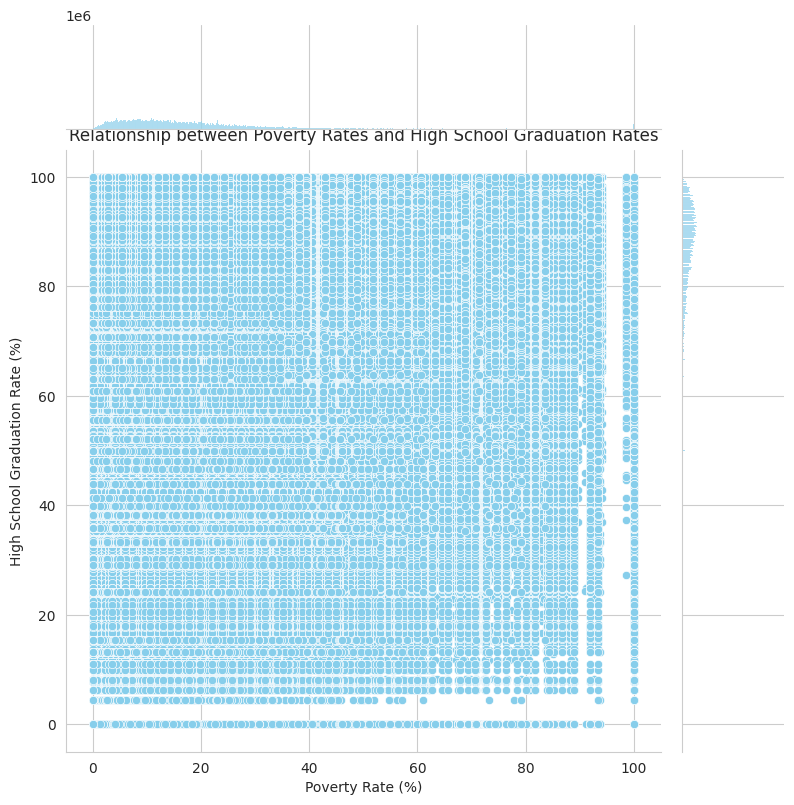

In [82]:
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')

combined_df = pd.merge(df_pct_poverty, df_pct_completed_hs, how='inner', on='Geographic Area')

sns.jointplot(data=combined_df, x='poverty_rate', y='percent_completed_hs', kind='scatter', height=8, color='skyblue', edgecolor='w')

plt.title('Relationship between Poverty Rates and High School Graduation Rates')
plt.xlabel('Poverty Rate (%)')
plt.ylabel('High School Graduation Rate (%)')
plt.show()

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio.

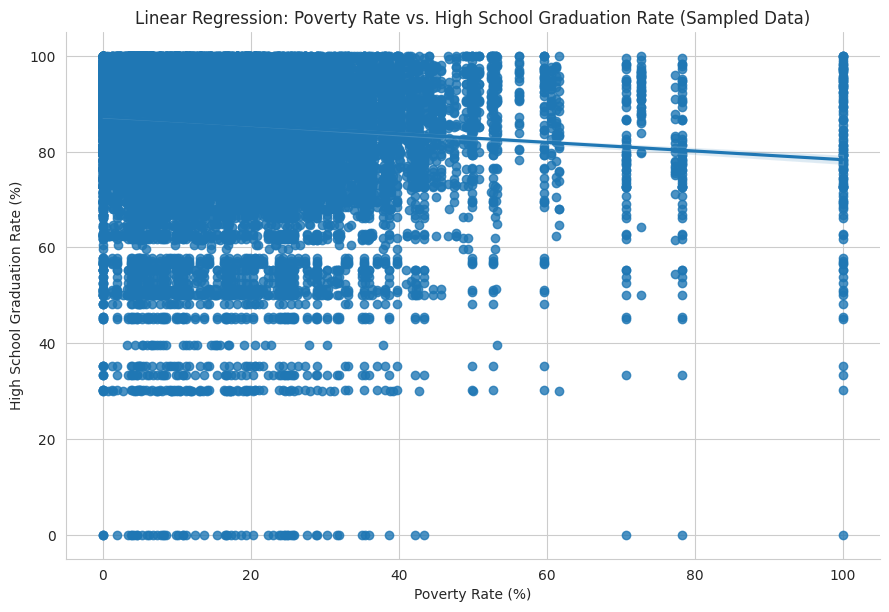

In [83]:
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')


df_pct_poverty_sampled = df_pct_poverty.sample(n=1000, random_state=42)
df_pct_completed_hs_sampled = df_pct_completed_hs.sample(n=1000, random_state=42)


combined_df = pd.merge(df_pct_poverty_sampled, df_pct_completed_hs_sampled, how='inner', on='Geographic Area')

sns.lmplot(data=combined_df, x='poverty_rate', y='percent_completed_hs', height=6, aspect=1.5)

plt.title('Linear Regression: Poverty Rate vs. High School Graduation Rate (Sampled Data)')
plt.xlabel('Poverty Rate (%)')
plt.ylabel('High School Graduation Rate (%)')
plt.show()



# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections.

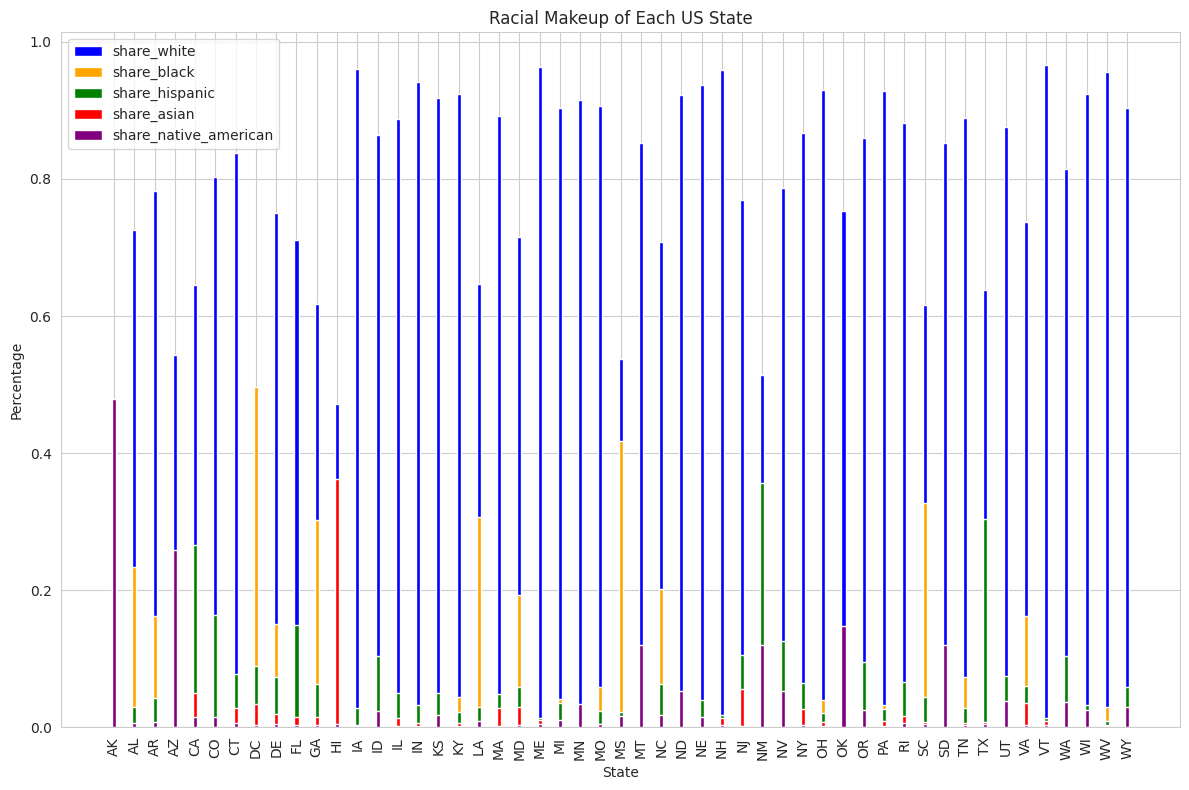

In [84]:
race_columns = ['share_white', 'share_black', 'share_hispanic', 'share_asian', 'share_native_american']
for col in race_columns:
    df_share_race_city[col] = pd.to_numeric(df_share_race_city[col], errors='coerce')

df_share_race_city.dropna(subset=race_columns, inplace=True)

df_state_race_sum = df_share_race_city.groupby('Geographic area')[race_columns].sum().reset_index()

total_population = df_state_race_sum[race_columns].sum(axis=1)
for race in race_columns:
    df_state_race_sum[race] /= total_population

plt.figure(figsize=(12, 8))
bar_width = 0.2

colors = ['blue', 'orange', 'green', 'red', 'purple']

for i, race in enumerate(race_columns):
    plt.bar(df_state_race_sum['Geographic area'], df_state_race_sum[race], width=bar_width, color=colors[i], label=race)

plt.xlabel('State')
plt.ylabel('Percentage')
plt.title('Racial Makeup of Each US State')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

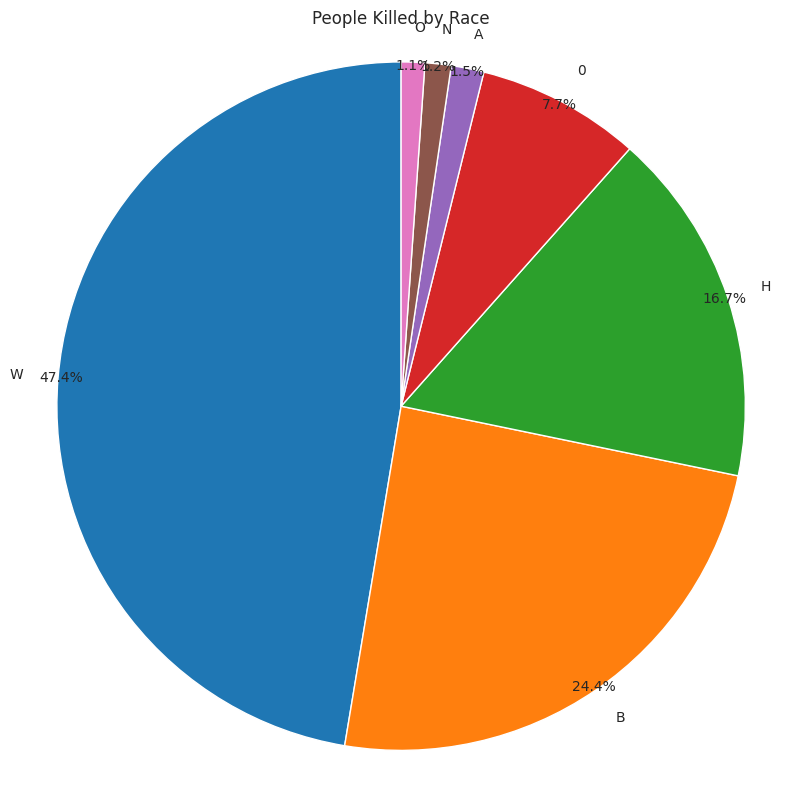

In [85]:
race_counts = df_fatalities['race'].value_counts()


colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']



plt.figure(figsize=(8, 8))
plt.pie(race_counts, labels=race_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, pctdistance=0.99)
plt.title('People Killed by Race')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women.

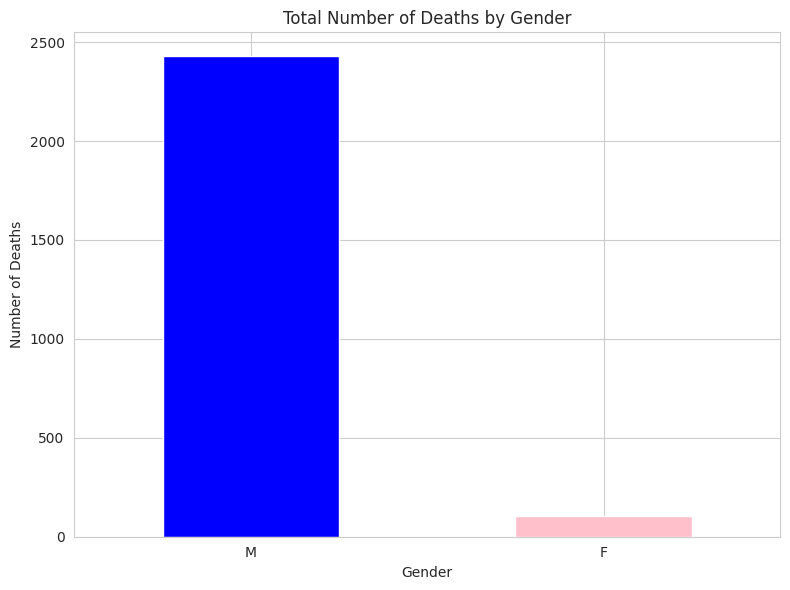

In [86]:
gender_counts = df_fatalities['gender'].value_counts()

plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['blue', 'pink'])
plt.title('Total Number of Deaths by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death?

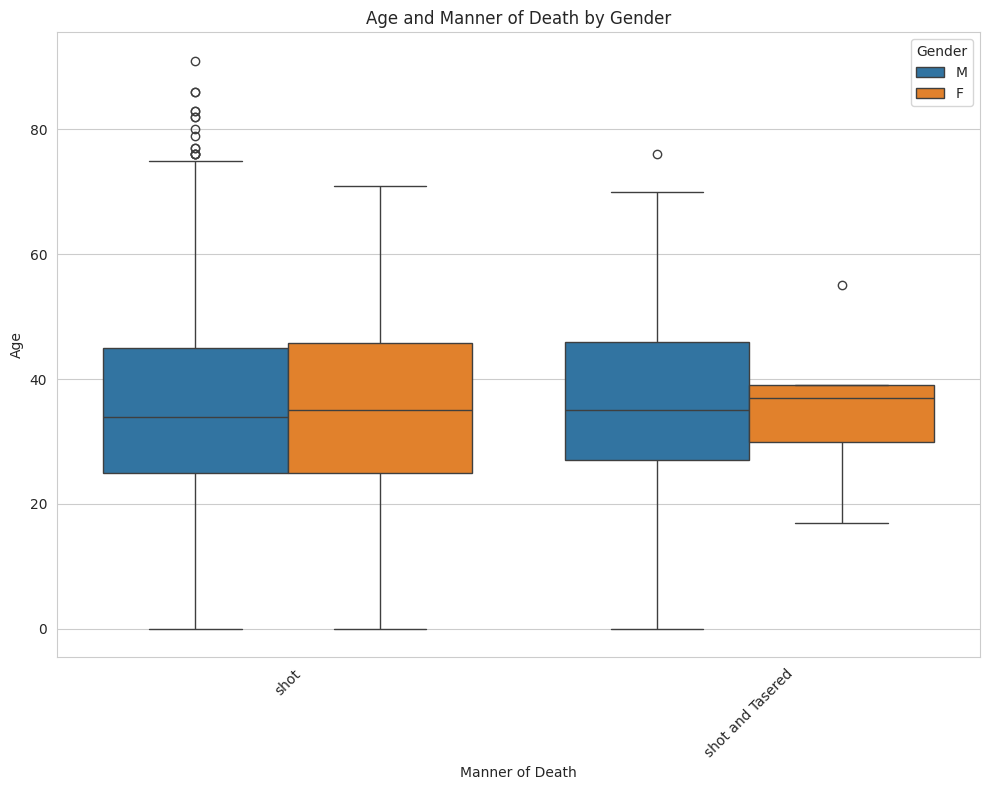

In [87]:
df_filtered = df_fatalities.dropna(subset=['age', 'manner_of_death'])


plt.figure(figsize=(10, 8))
sns.boxplot(x='manner_of_death', y='age', hue='gender', data=df_filtered)
plt.title('Age and Manner of Death by Gender')
plt.xlabel('Manner of Death')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

# Were People Armed?

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed?

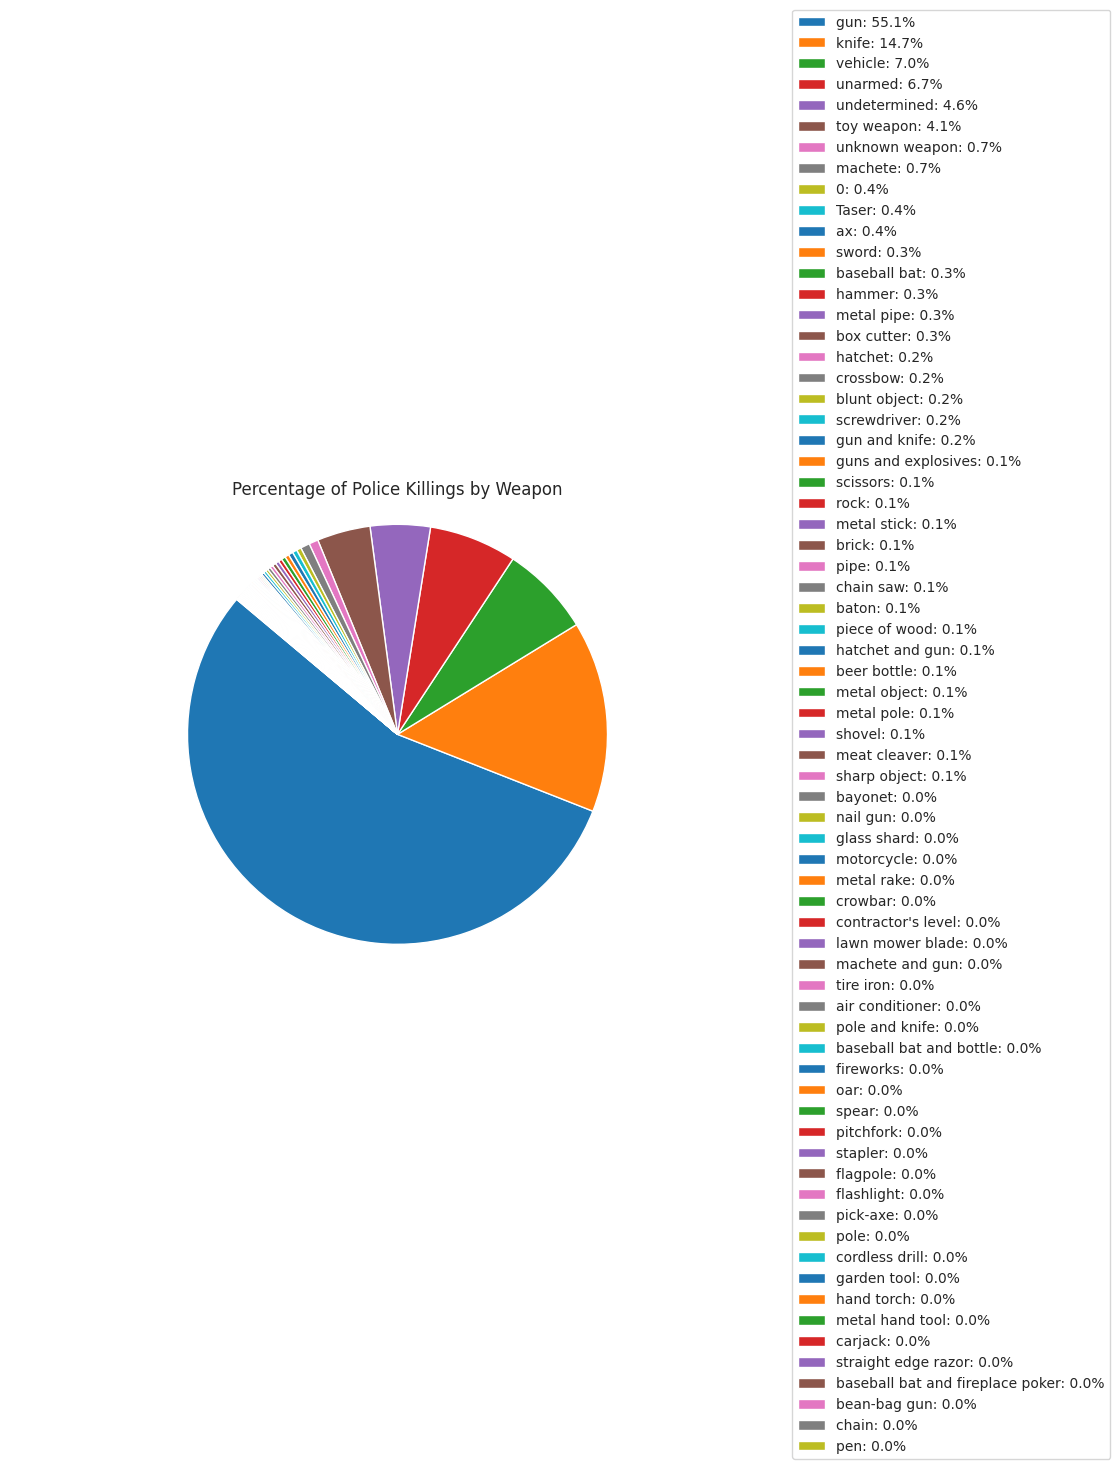

Number of armed cases: 1948
Number of unarmed cases: 587


In [88]:
armed_counts = df_fatalities['armed'].value_counts()

total_cases = armed_counts.sum()

plt.figure(figsize=(10, 6))
plt.pie(armed_counts, labels=None, startangle=140)
plt.title('Percentage of Police Killings by Weapon')

plt.legend(labels=[f"{label}: {count / total_cases * 100:.1f}%" for label, count in armed_counts.items()],
           loc='center left', bbox_to_anchor=(1, 0.5))

plt.axis('equal')
plt.show()


print(f"Number of armed cases: {armed_counts['gun'] + armed_counts['knife'] + armed_counts['vehicle']}")


print(f"Number of unarmed cases: {armed_counts.sum() - armed_counts['gun'] - armed_counts['knife'] - armed_counts['vehicle']}")


# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [89]:
under_25_count = (df_fatalities['age'] < 25).sum()

total_fatalities = len(df_fatalities)

percentage_under_25 = (under_25_count / total_fatalities) * 100

print(f"Percentage of people killed who were under 25 years old: {percentage_under_25:.2f}%")


Percentage of people killed who were under 25 years old: 20.79%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police.

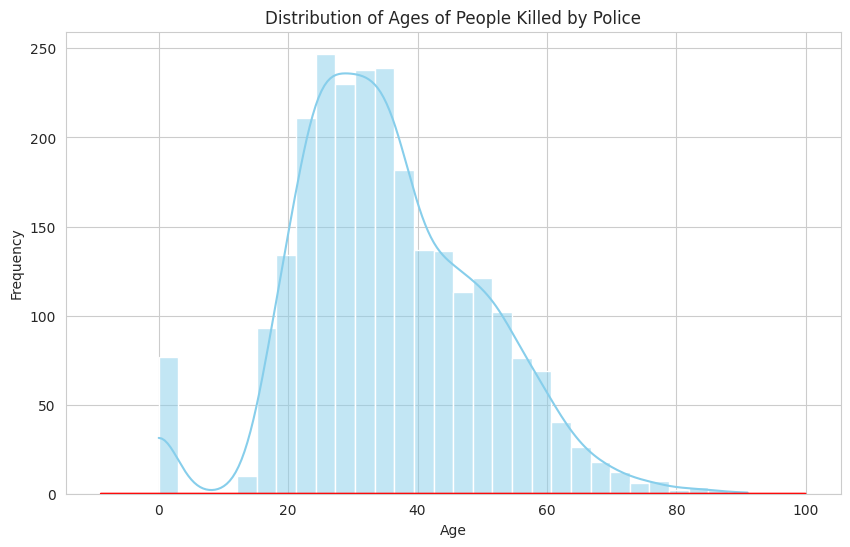

In [90]:
sns.set_style('whitegrid')

plt.figure(figsize=(10, 6))

sns.histplot(df_fatalities['age'], kde=True, color='skyblue', bins=30)


sns.kdeplot(df_fatalities['age'], color='red')


plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages of People Killed by Police')


plt.show()


Create a seperate KDE plot for each race. Is there a difference between the distributions?

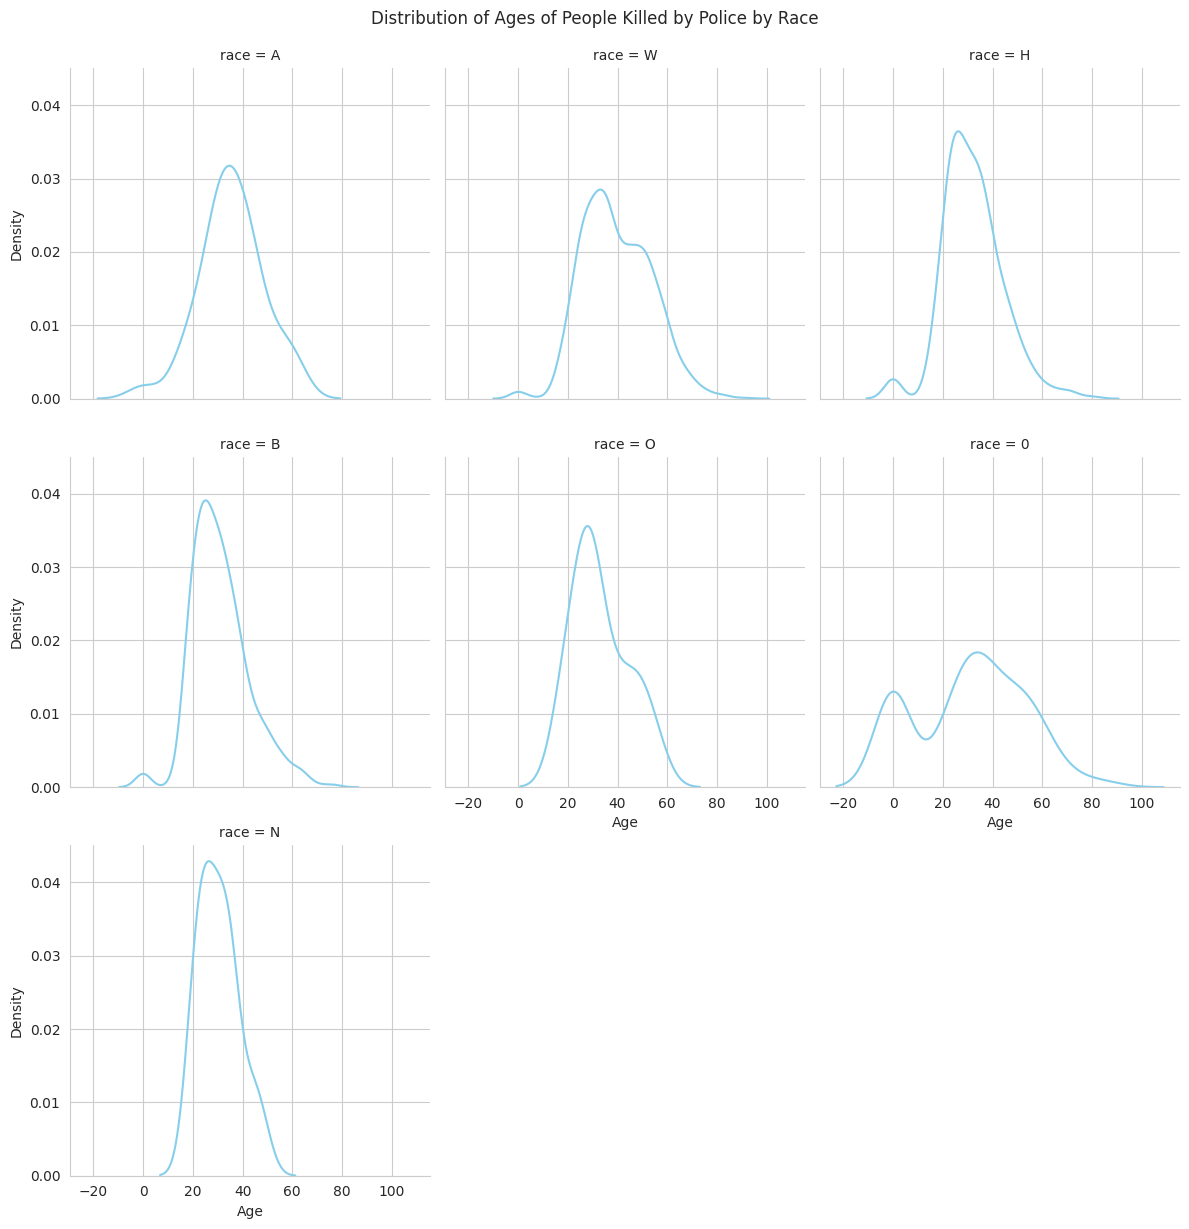

In [91]:
sns.set_style('whitegrid')

g = sns.FacetGrid(df_fatalities, col="race", col_wrap=3, height=4)
g.map(sns.kdeplot, "age", color="skyblue")

g.set_axis_labels("Age", "Density")
g.fig.suptitle("Distribution of Ages of People Killed by Police by Race", y=1.02)

plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race.

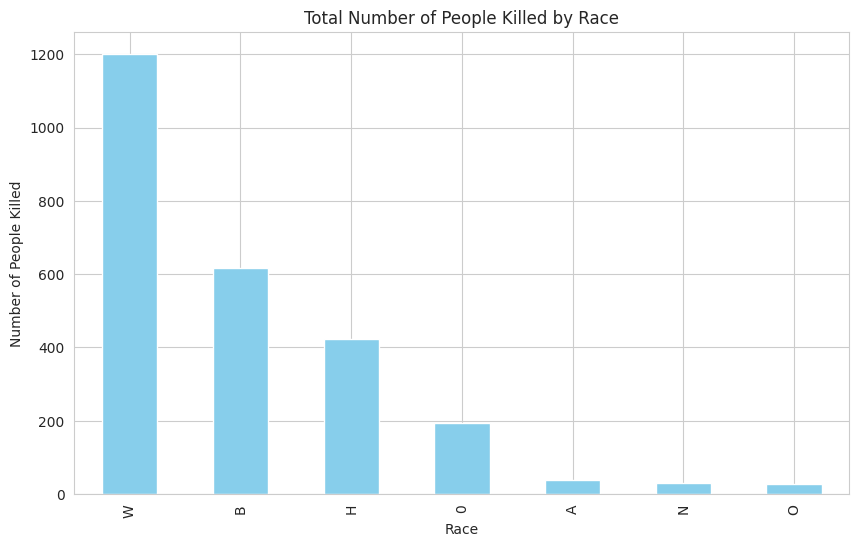

In [92]:
race_counts = df_fatalities['race'].value_counts()

plt.figure(figsize=(10, 6))
race_counts.plot(kind='bar', color='skyblue')

plt.xlabel('Race')
plt.ylabel('Number of People Killed')
plt.title('Total Number of People Killed by Race')

plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [93]:
mental_illness_count = df_fatalities['signs_of_mental_illness'].sum()

total_killed = len(df_fatalities)

percentage_mental_illness = (mental_illness_count / total_killed) * 100

print("Percentage of people killed by police diagnosed with a mental illness:", percentage_mental_illness)


Percentage of people killed by police diagnosed with a mental illness: 24.970414201183434


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

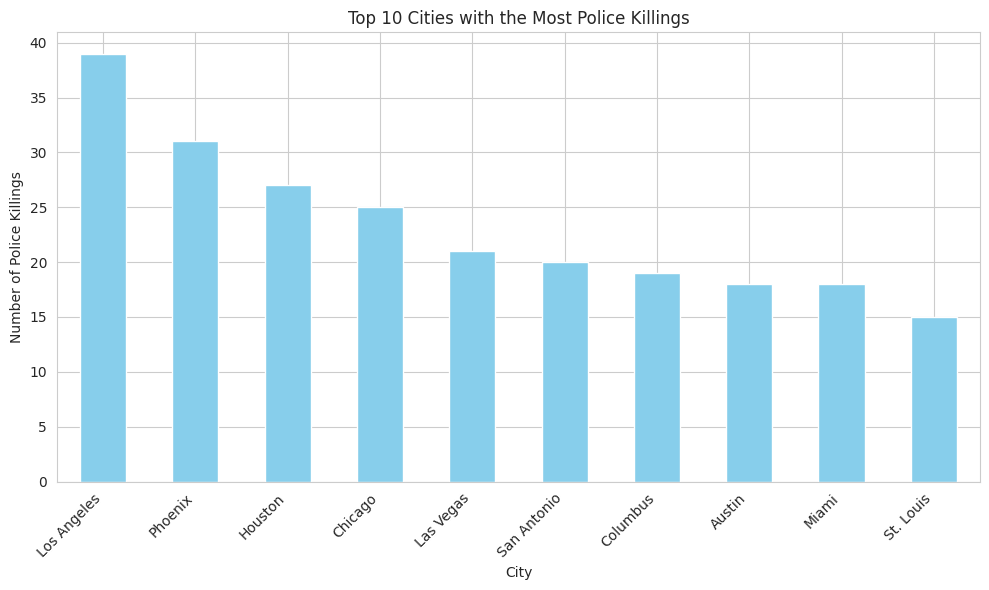

In [94]:
top_cities = df_fatalities['city'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_cities.plot(kind='bar', color='skyblue')
plt.title('Top 10 Cities with the Most Police Killings')
plt.xlabel('City')
plt.ylabel('Number of Police Killings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city.

In [174]:
total_deaths_by_race = df_fatalities['race'].value_counts()

top_10_cities = df_fatalities['city'].value_counts().head(10).index

df_top_10_fatalities = df_fatalities[df_fatalities['city'].isin(top_10_cities)]

deaths_by_race_per_city = df_top_10_fatalities.groupby(['city', 'race']).size().unstack(fill_value=0)
deaths_by_race_per_city['state'] = df_top_10_fatalities.groupby('city')['state'].first()

df_share_race_city_copy = df_share_race_city.copy()

df_share_race_city_copy['City'] = df_share_race_city_copy['City'].apply(lambda x: x.rsplit(" ", 1)[0])

share_of_race_per_city = df_share_race_city_copy[df_share_race_city_copy['City'].isin(top_10_cities)]

merged_data = pd.merge(deaths_by_race_per_city, share_of_race_per_city, left_on=['city', 'state'], right_on=['City', 'Geographic area'])

merged_data = merged_data[merged_data['state'] == merged_data['Geographic area']]

merged_data['share_white'] = pd.to_numeric(merged_data['share_white'], errors='coerce')
merged_data['share_black'] = pd.to_numeric(merged_data['share_black'], errors='coerce')
merged_data['share_native_american'] = pd.to_numeric(merged_data['share_native_american'], errors='coerce')
merged_data['share_asian'] = pd.to_numeric(merged_data['share_asian'], errors='coerce')
merged_data['share_hispanic'] = pd.to_numeric(merged_data['share_hispanic'], errors='coerce')

for race in ['W', 'B', 'H', 'A', 'N']:
    merged_data[f'death_rate_{race}'] = merged_data[race] / merged_data['share_white'] * 100000

print(merged_data)


   A   B   H  N  O   W state Geographic area         City share_white  \
0  0   3   2  0  0  12    TX              TX       Austin        68.3   
1  0  20   1  0  0   2    IL              IL      Chicago          45   
2  0  11   0  0  1   6    OH              OH     Columbus        61.5   
3  1  13   6  1  0   3    TX              TX      Houston        50.5   
4  0   3   4  0  0   9    NV              NV    Las Vegas        62.1   
5  1  10  19  0  0   6    CA              CA  Los Angeles        49.8   
6  0   8   6  0  0   3    FL              FL        Miami        72.6   
7  0   2  11  3  0  11    AZ              AZ      Phoenix        65.9   
8  0   3  12  0  0   3    TX              TX  San Antonio        72.6   
9  0  11   0  0  0   3    MO              MO    St. Louis        43.9   

  share_black share_native_american share_asian share_hispanic  
0         8.1                   0.9         6.3           35.1  
1        32.9                   0.5         5.5           28.9  
2

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? **bold text**

In [145]:
if 'Unnamed: 0' in df_fatalities.columns:
    df_fatalities = df_fatalities.drop('Unnamed: 0', axis=1)

df_fatalities.drop_duplicates(['date', 'city'], keep='first', inplace=True)


df_fatalities['year'] = pd.to_datetime(df_fatalities['date']).dt.year

deaths_by_state_year = df_fatalities.groupby(['state', 'year']).size().reset_index(name='deaths')

choropleth_map = px.choropleth(deaths_by_state_year,
                               locations='state',
                               locationmode='USA-states',
                               color='deaths',
                               hover_name='state',
                               animation_frame='year',
                               title='Police Killings by US State Over Time')

choropleth_map.show()


# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data?

[2015 2016 2017]


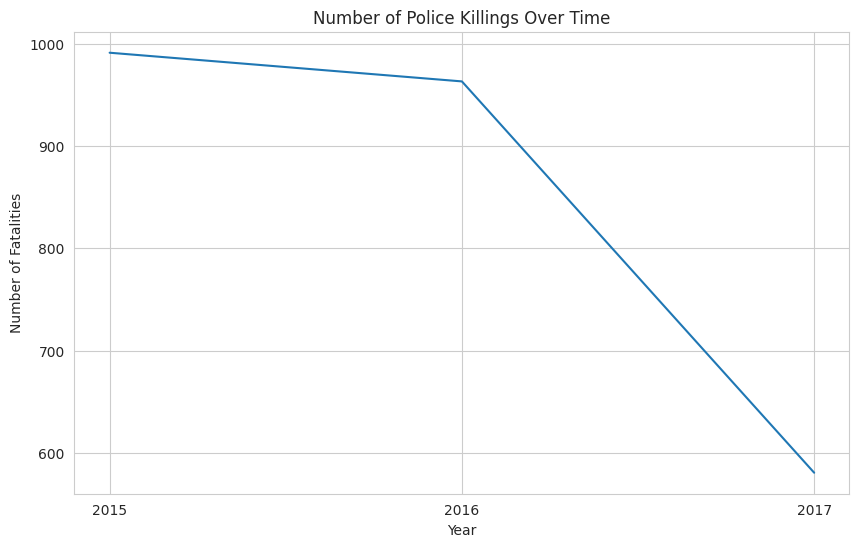

In [134]:
from matplotlib.ticker import MaxNLocator

df_fatalities['date'] = pd.to_datetime(df_fatalities['date'], format='%d/%m/%y', errors='coerce')

df_fatalities = df_fatalities.dropna(subset=['date'])

df_fatalities['year'] = df_fatalities['date'].dt.year

fatalities_by_year = df_fatalities.groupby('year').size()

plt.figure(figsize=(10, 6))
fatalities_by_year.plot(kind='line')
plt.title('Number of Police Killings Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Fatalities')
plt.grid(True)

plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.show()